## Задание 1.3.1
Задайте 4 точки в трехмерном пространстве, рассчитайте между ними расстояния по описанным в примере выше метрикам. Отобразите точки в трехмерном пространстве.

Расстояние Евклида между p1 и p2: 6.708203932499369
Квадрат расстояния Евклида между p2 и p3: 25.999999999999996
Расстояние Чебышева между p3 и p4: 5.0
Расстояние Хемминга между p1 и p4: 11.0


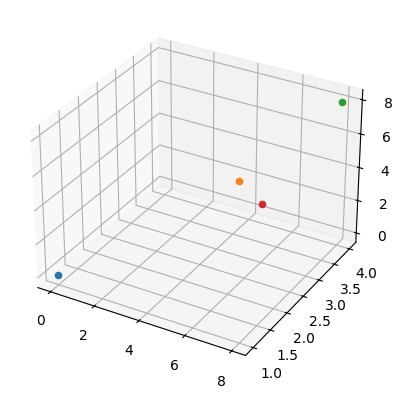

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

point_1 = np.array((0, 1, 0))
point_2 = np.array((5, 3, 4))
point_3 = np.array((8, 4, 8))
point_4 = np.array((6, 3, 3))

figure = plt.figure()
axis = figure.add_subplot(111, projection='3d')

axis.scatter(*point_1)
axis.scatter(*point_2)
axis.scatter(*point_3)
axis.scatter(*point_4)

print("Расстояние Евклида между p1 и p2:",
      np.linalg.norm(point_1 - point_2))
print("Квадрат расстояния Евклида между p2 и p3:",
      np.linalg.norm(point_2 - point_3) ** 2)
print("Расстояние Чебышева между p3 и p4:",
      np.linalg.norm(point_3 - point_4, ord=np.inf))
print("Расстояние Хемминга между p1 и p4:",
      np.linalg.norm(point_4 - point_1, ord=1))

plt.show()

## Задание 1.3.2
Создать 5x5 матрицу со значениями в строках от 0 до 4. Для создания необходимо использовать функцию arange.

In [ ]:
matrix = np.zeros(shape=(5, 5))
matrix += np.arange(5)
print(matrix)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


## Задание 2.3.1
Для предыдущего примера поэкспериментируйте с параметрами классификатора:
1.	Установите другое количество ближайших соседей (k = 1, 5, 10).
2.	Установите размер тестовой выборки 15% от всего датасета.
3.	Постройте графики и оцените качество моделей, проанализируйте результаты.

k = 1
accuracy: 0.913
k = 5
accuracy: 0.957
k = 10
accuracy: 1.0


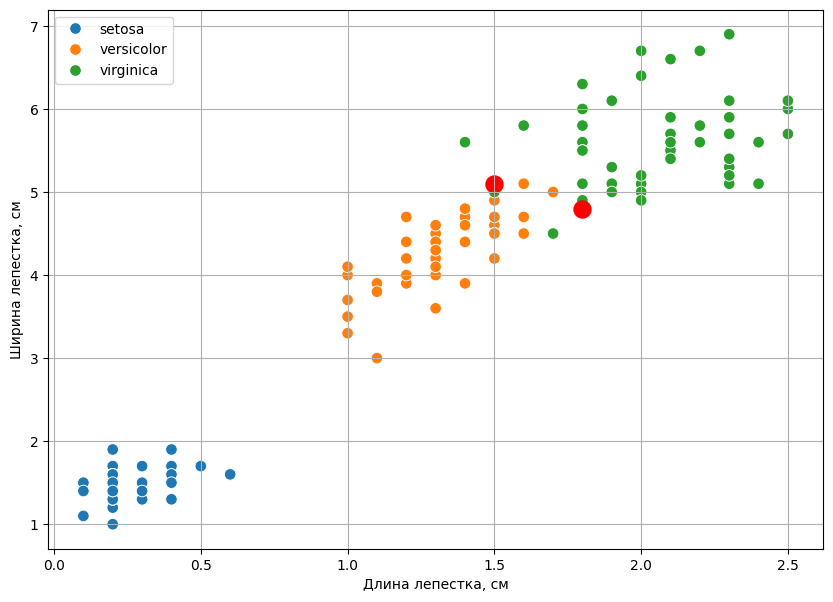

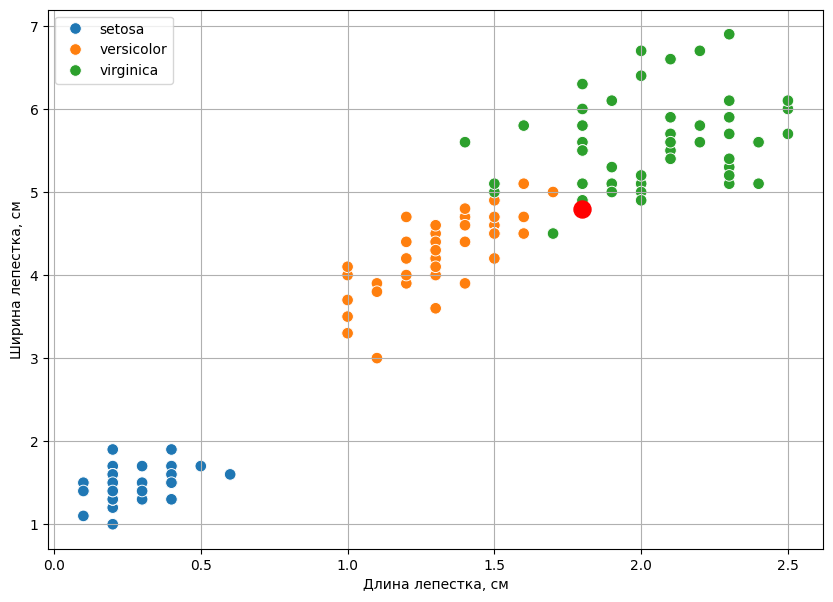

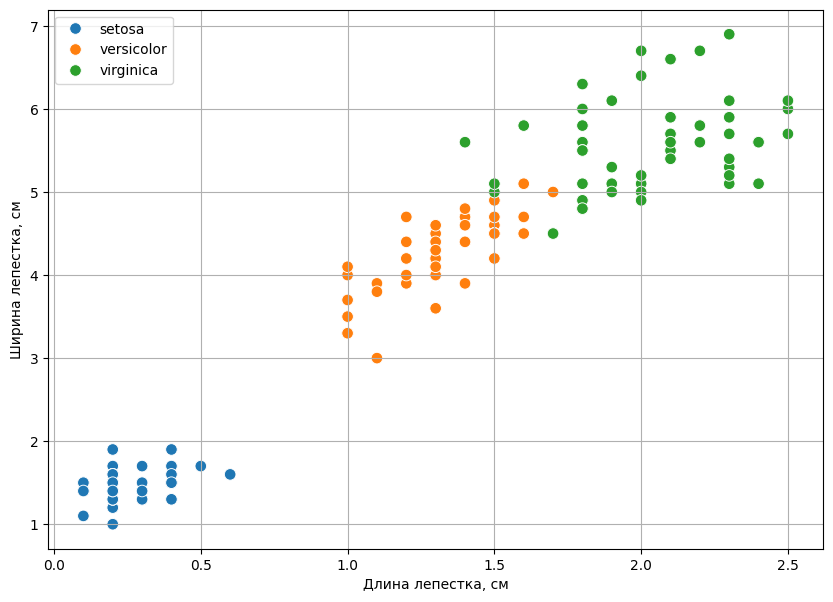

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sb

iris = sb.load_dataset('iris')

X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size = 0.15
)


for k in [1, 5, 10]:
  print("k =", k)
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train)
  model

  y_pred = model.predict(X_test)

  plt.figure(figsize=(10, 7))
  sb.scatterplot(
      data=iris,
      x='petal_width', y='petal_length',
      hue='species',
      s=70
  )
  plt.xlabel('Длина лепестка, см')
  plt.ylabel('Ширина лепестка, см')
  plt.legend(loc=2)
  plt.grid()

  for i in range(len(y_test)):
      if np.array(y_test)[i] != y_pred[i]:
          plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)

  print(f'accuracy: {accuracy_score(y_test, y_pred) :.3}')

## Задание 3.3.2
Определите набор признаков человека, по аналогии из РТ 1, – например, цвет глаз и конвертируйте его в матрицу признаков.

In [3]:
from sklearn.feature_extraction import DictVectorizer

data_dict = [
    { "Имя": "Ольга", "Возраст": "34", "Рост": "158"},
    { "Имя": "Яна", "Возраст": "29", "Рост": "169"},
    { "Имя": "Виктор", "Возраст": "23", "Рост": "184"}
]

dictvectorizer =  DictVectorizer(sparse=False)
features = dictvectorizer.fit_transform(data_dict)
features

array([[0., 0., 1., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 1.]])